# Air Passengers Forecast USING  ARIMA & SARIMA

#### IMPORT  LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller  
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.2f}'.format

#### Defining parameters for the plots

In [2]:
from matplotlib.pylab import rcParams
plt.rcParams ['figure.figsize']=(15,5)
plt.rcParams ['axes.grid']=False
plt.rcParams['font.size']=10
plt.rcParams['font.style']='normal'

#### IMPORT THE DATASET

In [3]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### CHECK FOR MISSING VALUES AND BASIC INFO

In [4]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.describe()

,#Passengers
count,144.00
mean,280.30
std,119.97
min,104.00
25%,180.00
50%,265.50
75%,360.50
max,622.00


- NO MISSING VALUES
- CONVERT THE MONTH COLUMN TO DATETIME DATATYPE AND ASSIGN IT AS INDEX 

In [7]:
data['Date'] = pd.to_datetime(data['Month'])
data = data.drop(columns = 'Month')
data = data.set_index('Date')
data = data.rename(columns = {'#Passengers':'Passengers'})
data.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### DATA VISUALIZATION:

Data Visualization
------------------


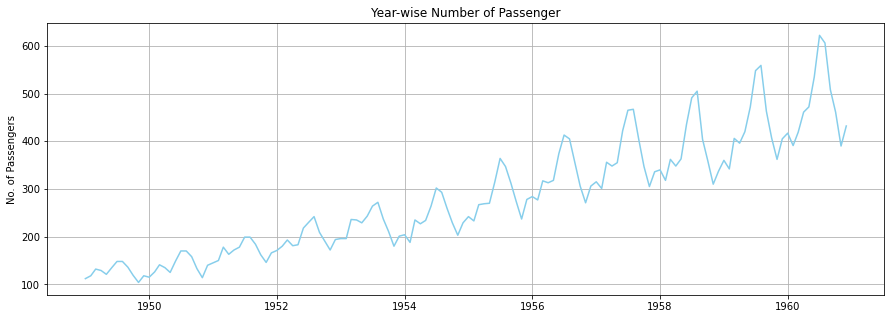

In [8]:
print('Data Visualization')
print('------------------')
plt.plot(data,c='skyblue')
plt.title('Year-wise Number of Passenger')
plt.ylabel('No. of Passengers')
plt.grid()
plt.show()

#### Observations:
1. Trend:There is an upward trend moving in forward direction.
2. Seasonality: There is a presence of seasonal components which is repeating for every 12 months.
3. Cyclicity: There is no as such cyclicity present in the dataset.

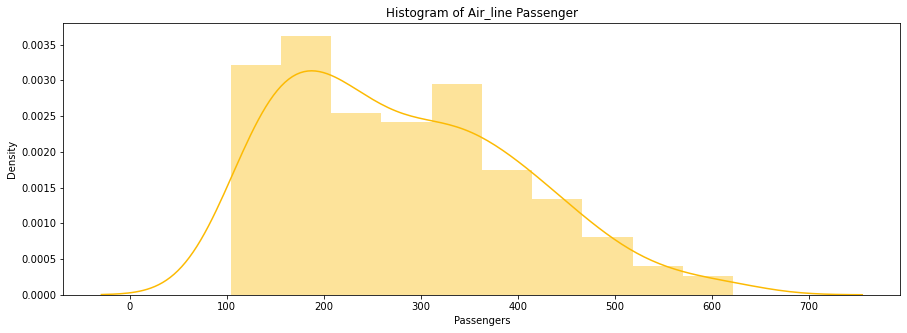

In [9]:
sns.distplot(data['Passengers'], bins=10, hist=True, kde=True, color='#fcba03');
plt.title('Histogram of Air_line Passenger');


Let us use the most basic technique for fitting this data which is Linear Regression before moving on to advanced models like SARIMA

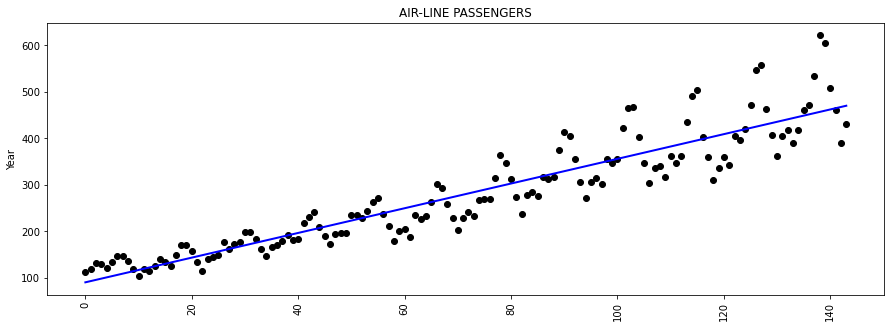

In [10]:
X = np.arange(len(data['Passengers'])).reshape(-1, 1)
y = data['Passengers'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(15,5))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.title('AIR-LINE PASSENGERS');
plt.ylabel('Year');
plt.xticks(rotation=90);


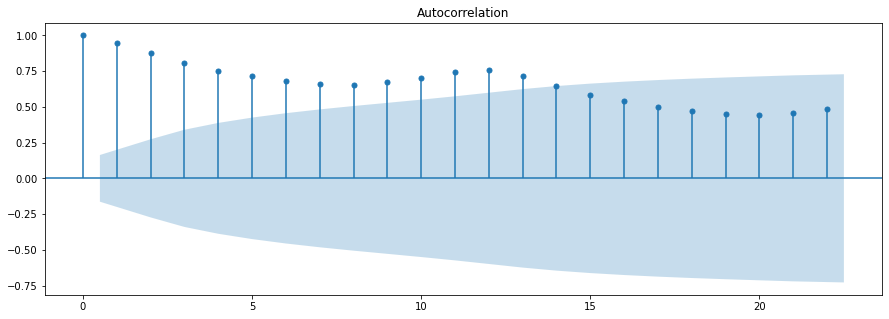

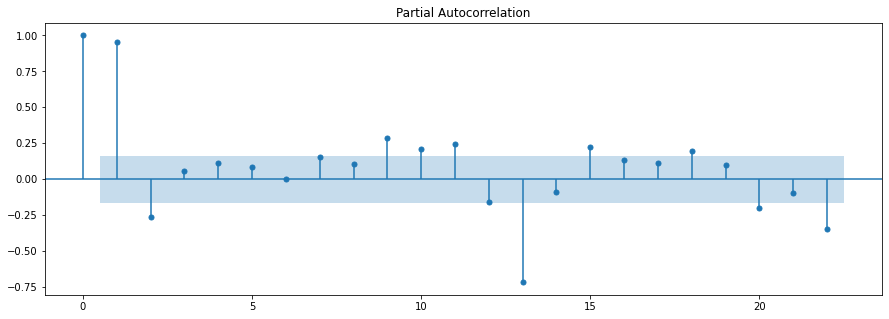

In [11]:
plot_acf(data['Passengers']); # Autocorrelation function plot
plot_pacf(data['Passengers']); # Partial Autocorrelation function plot

#### Stationarity Check Using Augmented Dicky Fuller Test Statistics:

In [12]:

print('Results of Dickey-Fuller Test:')
print('------------------------------')
result=adfuller(data['Passengers'])
print('ADF Statistics: {}'.format(result[0]))
print('p- value: {}'.format(result[1]))
if result[1] <= 0.05:
     print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.")
else:
     print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

Results of Dickey-Fuller Test:
------------------------------
ADF Statistics: 0.8153688792060423
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


### DATA TRANSFORMATION FROM NON-STATIONARY TO STATIONARY

1]Log Transormation

2] Subtracting simple moving average

3]Subtracting exponential moving average

4] Subtracting from previous value(shift)

5] Seasonal decomposition

In [13]:
def test_stationarity(timeseries):
    print('Stationarity Check:')
    print('------------------')
    result=adfuller(timeseries)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

### 1. Log Transformation:

In [14]:
data_log=np.log(data)
print(" Log tranformed data:")
print('--------------------')
print(data_log.head())
print('')
test_stationarity(data_log)

 Log tranformed data:
--------------------
            Passengers
Date                  
1949-01-01        4.72
1949-02-01        4.77
1949-03-01        4.88
1949-04-01        4.86
1949-05-01        4.80

Stationarity Check:
------------------
ADF Statistics: -1.7170170891069714
p- value: 0.4223667747703857
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


### 2.Differencing simple moving average:

In [15]:
data_log_MA=data_log.rolling(12).mean()
data_log_difference=data_log-data_log_MA
print(data_log_difference)

# removing NAN values otherwise in ADE test it will throw error
data_log_difference.dropna(inplace=True)
test_stationarity(data_log_difference)

            Passengers
Date                  
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01        0.28
1960-09-01        0.10
1960-10-01       -0.01
1960-11-01       -0.18
1960-12-01       -0.09

[144 rows x 1 columns]
Stationarity Check:
------------------
ADF Statistics: -3.162907991300871
p- value: 0.022234630001243004
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


### 3.Differencing exponential moving average:

In [16]:
data_log_ema=data_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
print('Exponential Moving Average:')
print('---------------------------')
print(data_log_ema)
data_log_ema_difference=data_log-data_log_ema
print('Difference exponential Moving Average:')
print('-------------------------------------')
print(data_log_ema_difference)
test_stationarity(data_log_ema_difference)

Exponential Moving Average:
---------------------------
            Passengers
Date                  
1949-01-01        4.72
1949-02-01        4.75
1949-03-01        4.79
1949-04-01        4.81
1949-05-01        4.81
...                ...
1960-08-01        6.05
1960-09-01        6.06
1960-10-01        6.06
1960-11-01        6.06
1960-12-01        6.06

[144 rows x 1 columns]
Difference exponential Moving Average:
-------------------------------------
            Passengers
Date                  
1949-01-01        0.00
1949-02-01        0.03
1949-03-01        0.09
1949-04-01        0.05
1949-05-01       -0.01
...                ...
1960-08-01        0.36
1960-09-01        0.17
1960-10-01        0.07
1960-11-01       -0.09
1960-12-01        0.01

[144 rows x 1 columns]
Stationarity Check:
------------------
ADF Statistics: -3.601262420161679
p- value: 0.005736938801511851
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


### 4. Differencing Previous Values:

In [17]:
data_log_shift=data_log-data_log.shift()
data_log_shift.dropna(inplace=True)
print('Shifted log values:')
print('------------------')
print(data_log_shift)
#test stationarity
test_stationarity(data_log_shift)

Shifted log values:
------------------
            Passengers
Date                  
1949-02-01        0.05
1949-03-01        0.11
1949-04-01       -0.02
1949-05-01       -0.06
1949-06-01        0.11
...                ...
1960-08-01       -0.03
1960-09-01       -0.18
1960-10-01       -0.10
1960-11-01       -0.17
1960-12-01        0.10

[143 rows x 1 columns]
Stationarity Check:
------------------
ADF Statistics: -2.717130598388145
p- value: 0.0711205481508568
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


### 4a. Differencing Previous 2 values:

In [18]:
data_log_shift2=data_log-data_log.shift(2)
data_log_shift2.dropna(inplace=True)
print('Shifted log values:')
print('------------------')
print(data_log_shift2)
#test stationarity
test_stationarity(data_log_shift2)

Shifted log values:
------------------
            Passengers
Date                  
1949-03-01        0.16
1949-04-01        0.09
1949-05-01       -0.09
1949-06-01        0.05
1949-07-01        0.20
...                ...
1960-08-01        0.12
1960-09-01       -0.20
1960-10-01       -0.27
1960-11-01       -0.26
1960-12-01       -0.06

[142 rows x 1 columns]
Stationarity Check:
------------------
ADF Statistics: -3.1679073752887454
p- value: 0.021919114564038708
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


### Finding ACF & PACF Values:

Text(0.5, 1.0, 'Partial Autocorrelation Function')

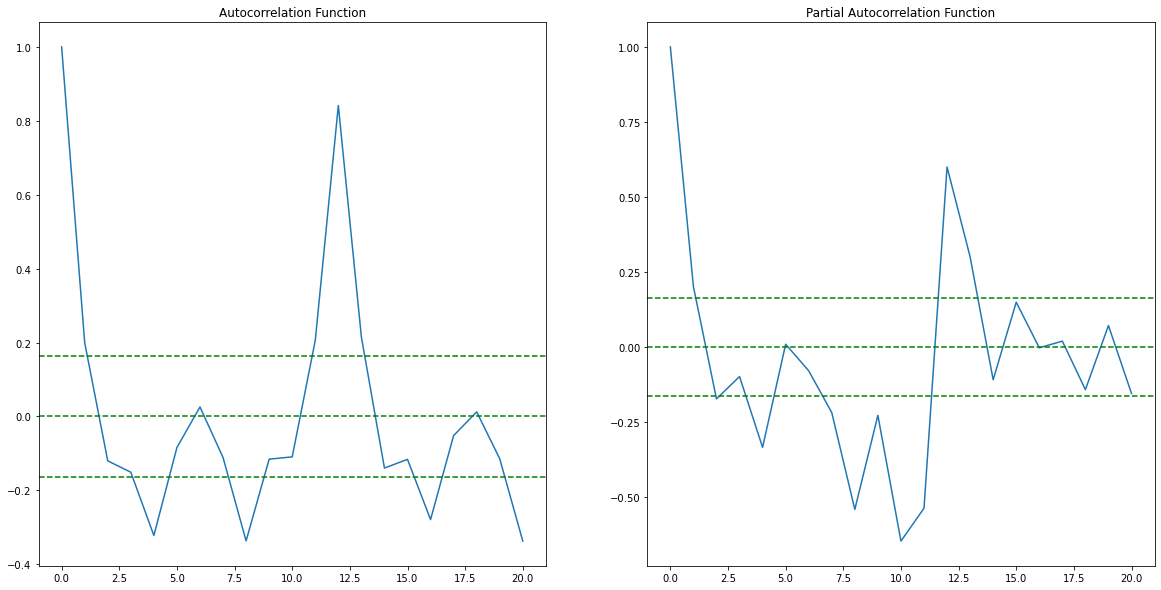

In [19]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_log_shift, nlags=20)
lag_pacf=pacf(data_log_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

## 1]ARIMA MODEL:

Lets Finally Build the ARIMA model with p=2, q=2 and I=1

In [20]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
print(results.summary())

G:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
G:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Tue, 13 Sep 2022   AIC                           -287.281
Time:                        21:09:03   BIC                           -269.504
Sample:                    02-01-1949   HQIC                          -280.057
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.D.Passengers     1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.D.Passengers  

####  Converting data from log to normal form:

In [21]:
predictions=pd.Series(results.fittedvalues, copy=True)
predictions_cum_sum=predictions.cumsum()
predictions_log=pd.Series(data_log['Passengers'].iloc[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_ARIMA=np.exp(predictions_log)
data['Pred_ARIMA']=predictions_ARIMA
data.head()

,Passengers,Pred_ARIMA
Date,,
1949-01-01,112,112.00
1949-02-01,118,113.08
1949-03-01,132,115.07
1949-04-01,129,118.30
1949-05-01,121,117.77


In [22]:
# Finding MSE AND RMSE
print('ARIMA Model Errors:')
print('-----------------')
MSE=mean_squared_error(data['Passengers'],data['Pred_ARIMA'])
print('Mean square Error:',MSE)
RMSE=np.sqrt(MSE)
print('Root Mean Square Error:',RMSE)

ARIMA Model Errors:
-----------------
Mean square Error: 8118.801576053378
Root Mean Square Error: 90.10439265681434


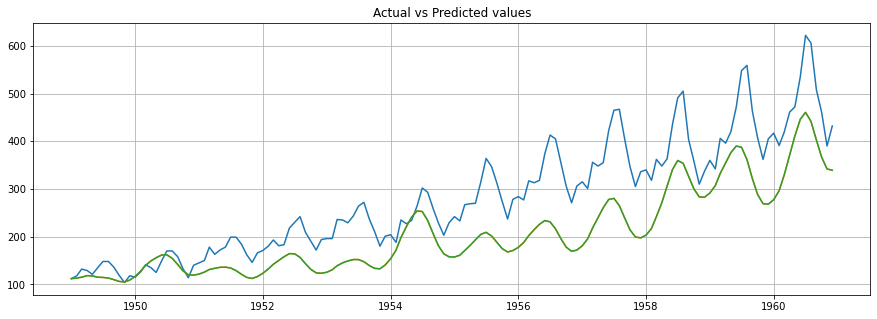

In [23]:
plt.figure(figsize=(15,5))
plt.plot(data)
plt.title('Actual vs Predicted values')
plt.grid()
plt.plot(predictions_ARIMA)

#### Forecasting for next 2 years using ARIMA:

In [27]:
future_pred=results.predict(start=len(data),end=len(data)+24,typ='levels')
future_pred=np.exp(future_pred)
future_pred.tail(15)

1961-11-01   516.66
1961-12-01   518.14
1962-01-01   529.94
1962-02-01   549.72
1962-03-01   573.36
1962-04-01   595.79
1962-05-01   612.33
1962-06-01   620.24
1962-07-01   619.60
1962-08-01   613.04
1962-09-01   604.60
1962-10-01   598.27
1962-11-01   596.95
1962-12-01   601.96
1963-01-01   612.98
Freq: MS, dtype: float64

### Plot Forecast for next 2 years (ARIMA Model)

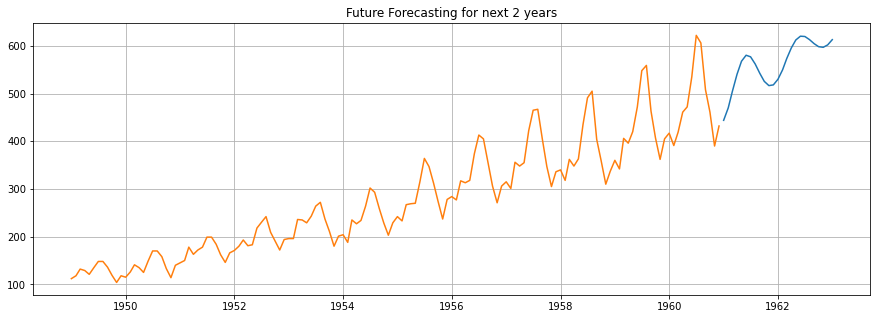

In [28]:
plt.figure(figsize=(15,5))
plt.plot(future_pred)
plt.plot(data['Passengers'])
plt.title('Future Forecasting for next 2 years')
plt.grid()
plt.show()

## 2]SARIMA MODEL:

In [29]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Passengers'],order=(2,1,2),seasonal_order=(1,1,1,12))
result=model.fit()
print(result.summary())

G:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
G:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -503.024
Date:                              Tue, 13 Sep 2022   AIC                           1020.048
Time:                                      21:11:24   BIC                           1040.174
Sample:                                  01-01-1949   HQIC                          1028.226
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4441      0.388      1.145      0.252      -0.316       1.204
ar.L2          0.32

<Figure size 1080x360 with 0 Axes>

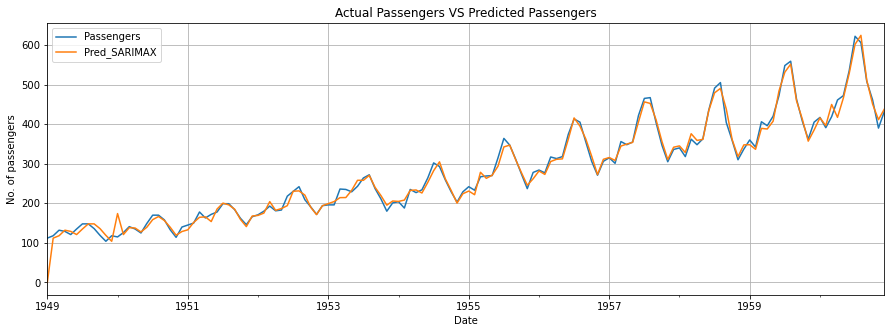

In [30]:
data['Pred_SARIMAX']=result.predict()
plt.figure(figsize=(15,5))
data[['Passengers','Pred_SARIMAX']].plot()
plt.title('Actual Passengers VS Predicted Passengers')
plt.ylabel('No. of passengers')
plt.grid()
plt.show()

In [31]:
# Finding MSE AND RMSE
print('SARIMA Model Errors:')
print('-----------------')
MSE=mean_squared_error(data['Passengers'],data['Pred_SARIMAX'])
print('Mean square Error:',MSE)
RMSE=np.sqrt(MSE)
print('Root Mean Square Error:',RMSE)

SARIMA Model Errors:
-----------------
Mean square Error: 236.18952312330066
Root Mean Square Error: 15.368458710075668


#### Forecasting For next 2 years using SARIMA Model

In [32]:
future_pred=result.predict(start=len(data),end=len(data)+24,typ='levels')
future_pred=future_pred
future_pred.tail(15)

1961-11-01   429.64
1961-12-01   473.37
1962-01-01   485.65
1962-02-01   460.81
1962-03-01   489.97
1962-04-01   532.02
1962-05-01   543.51
1962-06-01   606.37
1962-07-01   693.67
1962-08-01   678.09
1962-09-01   580.62
1962-10-01   533.46
1962-11-01   462.86
1962-12-01   505.16
1963-01-01   520.16
Freq: MS, Name: predicted_mean, dtype: float64

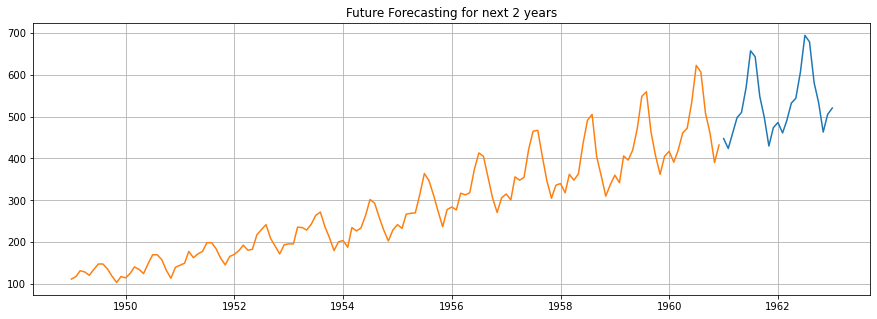

In [33]:
plt.figure(figsize=(15,5))
plt.plot(future_pred)
plt.plot(data['Passengers'])
plt.title('Future Forecasting for next 2 years')
plt.grid()
plt.show()

## FINAL PLOT:

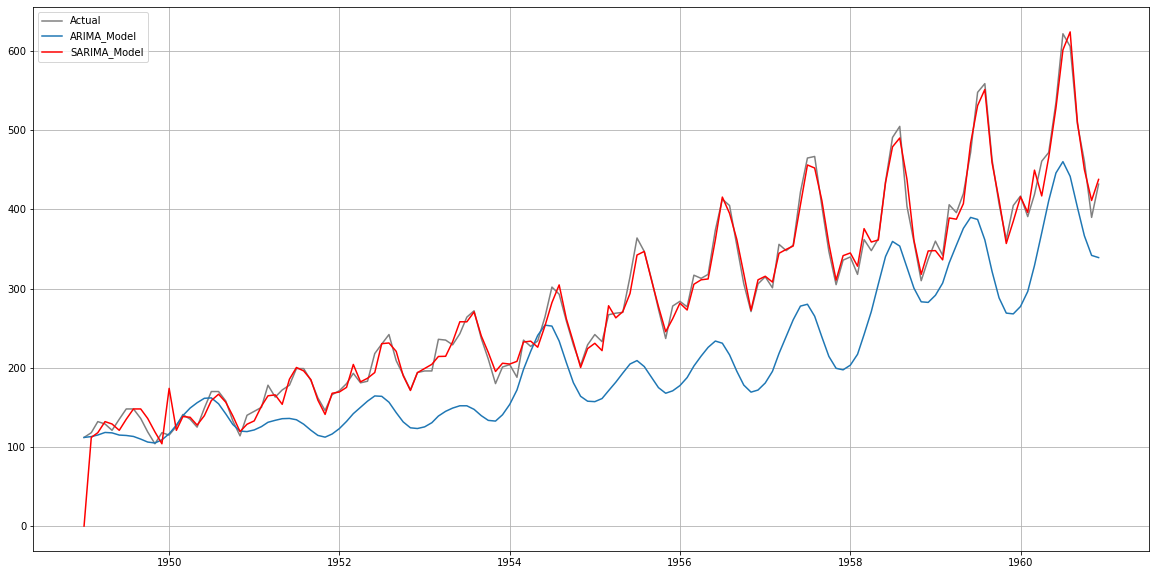

In [34]:
plt.figure(figsize=(20,10))
plt.plot(data['Passengers'],label="Actual",color='gray')
plt.plot(data['Pred_ARIMA'],label="ARIMA_Model")
plt.plot(data['Pred_SARIMAX'],label="SARIMA_Model",color='red')
plt.legend(loc='best')
plt.grid()
plt.show()